# Exploratory Analysis

In [135]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
import plotly.express as px
from sklearn.cluster import KMeans
from mpl_toolkits.mplot3d import Axes3D
import pickle
import random

In [136]:
df = pd.read_csv("data.csv", sep=",")
df_2 = pd.read_csv("data.csv", sep=",")

In [137]:
df.head(3)

,Channel,Region,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicassen
0,2,3,12669,9656,7561,214,2674,1338
1,2,3,7057,9810,9568,1762,3293,1776
2,2,3,6353,8808,7684,2405,3516,7844


In [138]:
df.shape

(440, 8)

In [139]:
df.describe()

,Channel,Region,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicassen
count,440.000000,440.000000,440.000000,440.000000,440.000000,440.000000,440.000000,440.000000
mean,1.322727,2.543182,12000.297727,5796.265909,7951.277273,3071.931818,2881.493182,1524.870455
std,0.468052,0.774272,12647.328865,7380.377175,9503.162829,4854.673333,4767.854448,2820.105937
min,1.000000,1.000000,3.000000,55.000000,3.000000,25.000000,3.000000,3.000000
25%,1.000000,2.000000,3127.750000,1533.000000,2153.000000,742.250000,256.750000,408.250000
50%,1.000000,3.000000,8504.000000,3627.000000,4755.500000,1526.000000,816.500000,965.500000
75%,2.000000,3.000000,16933.750000,7190.250000,10655.750000,3554.250000,3922.000000,1820.250000
max,2.000000,3.000000,112151.000000,73498.000000,92780.000000,60869.000000,40827.000000,47943.000000


In [140]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 440 entries, 0 to 439
Data columns (total 8 columns):
Channel             440 non-null int64
Region              440 non-null int64
Fresh               440 non-null int64
Milk                440 non-null int64
Grocery             440 non-null int64
Frozen              440 non-null int64
Detergents_Paper    440 non-null int64
Delicassen          440 non-null int64
dtypes: int64(8)
memory usage: 27.6 KB


Text(0, 0.5, 'Frecuencia')

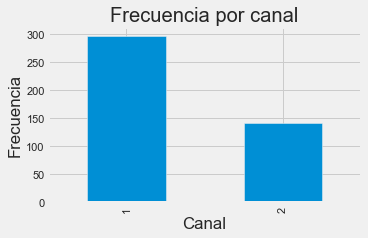

In [141]:
ax = df['Channel'].value_counts().plot(kind='bar',
                                    figsize=(5,3),
                                    title="Frecuencia por canal")
ax.set_xlabel("Canal")
ax.set_ylabel("Frecuencia")

Text(0, 0.5, 'Frecuencia')

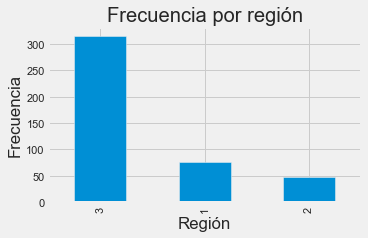

In [142]:
ax = df['Region'].value_counts().plot(kind='bar',
                                    figsize=(5,3),
                                    title="Frecuencia por región")
ax.set_xlabel("Región")
ax.set_ylabel("Frecuencia")

Text(0, 0.5, 'Gasto promedio anual')

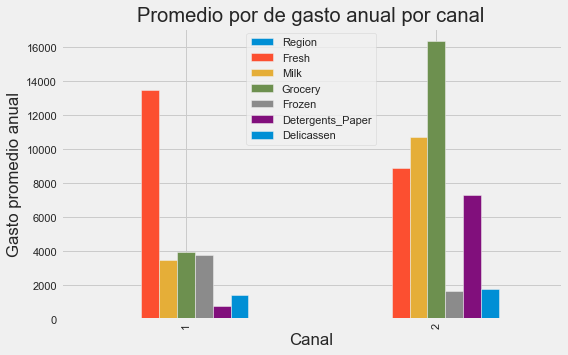

In [143]:
ax = df.groupby(["Channel"]).mean().plot(kind='bar',
                                    figsize=(8,5),
                                    title="Promedio por de gasto anual por canal")
ax.set_xlabel("Canal")
ax.set_ylabel("Gasto promedio anual")

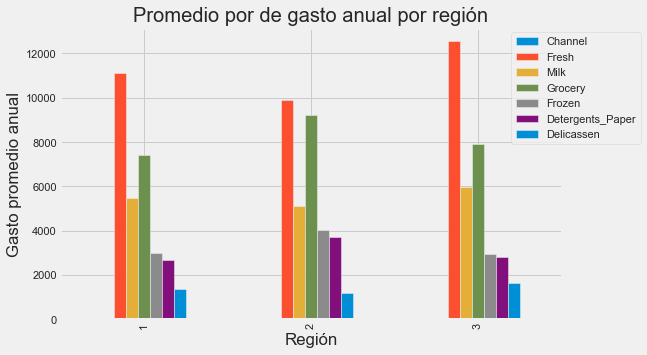

In [144]:
ax = df.groupby(["Region"]).mean().plot(kind='bar',
                                    figsize=(8,5),
                                    title="Promedio por de gasto anual por región")
ax.set_xlabel("Región")
ax.set_ylabel("Gasto promedio anual")
ax.legend(loc=(0.9,0.6))

C:\Users\Usuario\AppData\Local\Programs\Python\Python36\lib\site-packages\seaborn\distributions.py:2551: FutureWarning:

`distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).

C:\Users\Usuario\AppData\Local\Programs\Python\Python36\lib\site-packages\seaborn\_decorators.py:43: FutureWarning:

Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.

C:\Users\Usuario\AppData\Local\Programs\Python\Python36\lib\site-packages\seaborn\distributions.py:2551: FutureWarning:

`distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot`

<AxesSubplot:xlabel='Delicassen'>

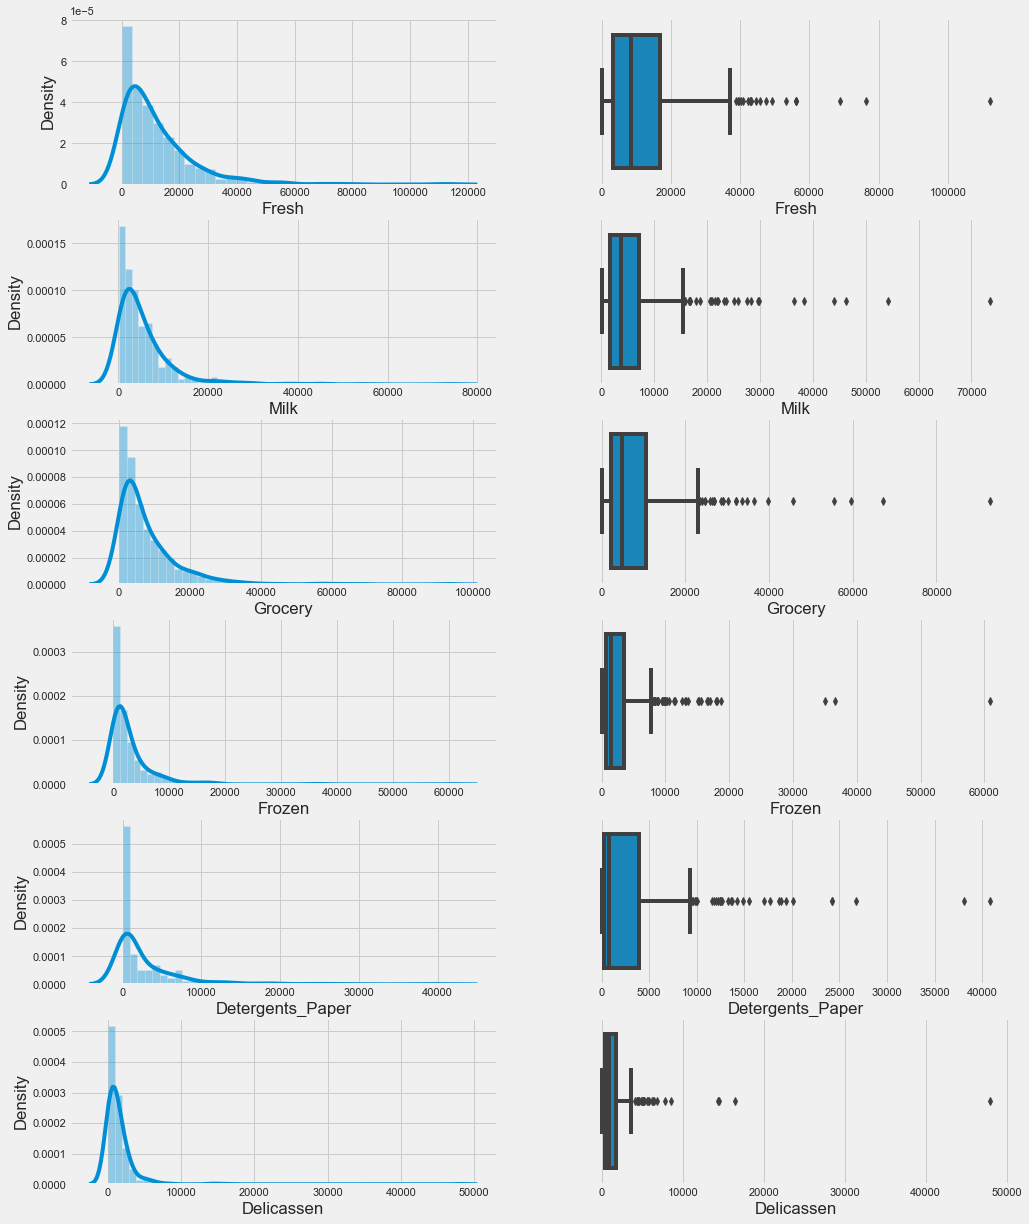

In [145]:
fig, axs = plt.subplots(6,2,figsize=(15,20))
sns.distplot(df["Fresh"], ax=axs[0, 0])
sns.boxplot(df["Fresh"], ax=axs[0, 1])
sns.distplot(df["Milk"], ax=axs[1, 0])
sns.boxplot(df["Milk"], ax=axs[1, 1])
sns.distplot(df["Grocery"], ax=axs[2, 0])
sns.boxplot(df["Grocery"], ax=axs[2, 1])
sns.distplot(df["Frozen"], ax=axs[3, 0])
sns.boxplot(df["Frozen"], ax=axs[3, 1])
sns.distplot(df["Detergents_Paper"], ax=axs[4, 0])
sns.boxplot(df["Detergents_Paper"], ax=axs[4, 1])
sns.distplot(df["Delicassen"], ax=axs[5, 0])
sns.boxplot(df["Delicassen"], ax=axs[5, 1])

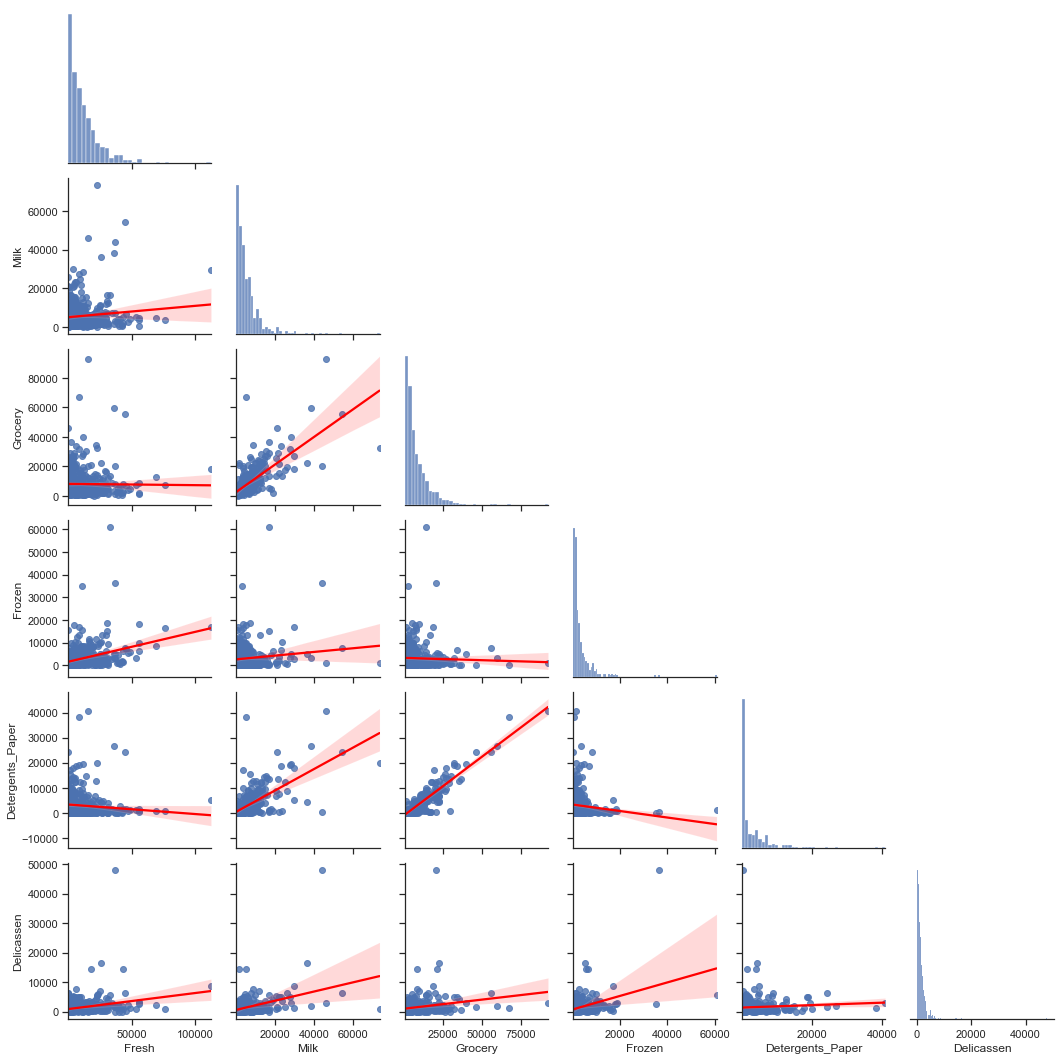

In [146]:
sns.set(style="ticks", color_codes=True)
sns.pairplot(df.loc[:, ["Fresh", "Milk", "Grocery", "Frozen", "Detergents_Paper", "Delicassen"]],
            kind="reg", plot_kws={'line_kws':{'color':'red'}}, corner=True)

# PCA

In [147]:
dummies = df[["Channel", "Region"]]
df = df.drop(["Channel", "Region"], axis=1)
dummies_gen = pd.get_dummies(dummies, columns=["Channel", "Region"])
df = pd.concat([df, dummies_gen], axis=1)

In [148]:
df.head()

,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicassen,Channel_1,Channel_2,Region_1,Region_2,Region_3
0,12669,9656,7561,214,2674,1338,0,1,0,0,1
1,7057,9810,9568,1762,3293,1776,0,1,0,0,1
2,6353,8808,7684,2405,3516,7844,0,1,0,0,1
3,13265,1196,4221,6404,507,1788,1,0,0,0,1
4,22615,5410,7198,3915,1777,5185,0,1,0,0,1


In [149]:
sc = StandardScaler()
data_scaled = sc.fit_transform(df)
pca = PCA(n_components=3)
random.seed(123)
pca_fitted = pca.fit_transform(data_scaled)

In [150]:
print(abs(pca.components_))
print(pca.explained_variance_ratio_)

[[0.05785041 0.39069548 0.46245846 0.06776055 0.4611306  0.10682163
  0.44619847 0.44619847 0.04602767 0.02879278 0.01910583]
 [0.37069247 0.19704599 0.036142   0.33961909 0.04436372 0.38587724
  0.10089135 0.10089135 0.39698974 0.29649889 0.53886235]
 [0.3151759  0.22305781 0.1065088  0.45369577 0.02958141 0.37930318
  0.1353701  0.1353701  0.39331748 0.23397658 0.49283427]]
[0.34291395 0.17340382 0.16418953]


In [151]:
principalDf = pd.DataFrame(data = pca_fitted[:,:], columns=["pc1","pc2","pc3"])

In [152]:
fig = px.scatter_3d(principalDf, x='pc1', y='pc3', z='pc2')
fig.show()

# Modeling

In [153]:
data_scaled = sc.fit_transform(df_2)

In [154]:
 kmeans_kwargs = {
"init": "random",
"n_init": 10,
"max_iter": 300,
"random_state": 42,
}

# A list holds the SSE values for each k
sse = []
for k in range(1, 11):
    kmeans = KMeans(n_clusters=k, **kmeans_kwargs)
    kmeans.fit(data_scaled)
    sse.append(kmeans.inertia_)

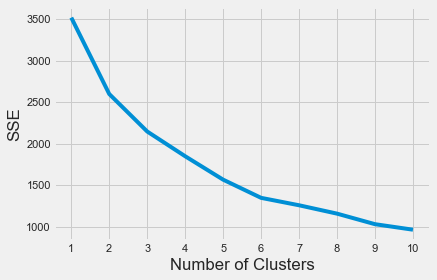

In [155]:
plt.style.use("fivethirtyeight")
plt.plot(range(1, 11), sse)
plt.xticks(range(1, 11))
plt.xlabel("Number of Clusters")
plt.ylabel("SSE")
plt.show()

In [156]:
clustering_kmeans = KMeans(n_clusters=2, precompute_distances="auto", n_jobs=-1, random_state=3425)
df['clusters'] = clustering_kmeans.fit_predict(data_scaled)
principalDf["clusters"] = df['clusters']

C:\Users\Usuario\AppData\Local\Programs\Python\Python36\lib\site-packages\sklearn\cluster\_kmeans.py:934: FutureWarning:

'precompute_distances' was deprecated in version 0.23 and will be removed in 0.25. It has no effect

C:\Users\Usuario\AppData\Local\Programs\Python\Python36\lib\site-packages\sklearn\cluster\_kmeans.py:939: FutureWarning:

'n_jobs' was deprecated in version 0.23 and will be removed in 0.25.



In [157]:
px.defaults.color_continuous_scale = px.colors.sequential.Aggrnyl
fig = px.scatter_3d(principalDf, x='pc1', y='pc3', z='pc2', color="clusters")
fig.show()

In [158]:
df_2["clusters"] = principalDf["clusters"]

In [159]:
#df_2["clusters"].to_csv("clusterss.csv", index=False)

ipykernel_launcher:1: FutureWarning:

The signature of `Series.to_csv` was aligned to that of `DataFrame.to_csv`, and argument 'header' will change its default value from False to True: please pass an explicit value to suppress this warning.



In [67]:
cluster_0 = df_2[df_2["clusters"]==0]
cluster_1 = df_2[df_2["clusters"]==1]
cluster_2 = df_2[df_2["clusters"]==2]

In [68]:
cluster_0.loc[:,["Fresh", "Milk", "Grocery", "Frozen", "Detergents_Paper", "Delicassen"]].describe()

,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicassen
count,297.000000,297.000000,297.000000,297.000000,297.000000,297.000000
mean,13396.868687,3315.367003,3907.565657,3637.861953,792.417508,1259.299663
std,13788.050997,3666.846979,3423.837476,5321.437631,1105.490811,1612.991407
min,3.000000,55.000000,3.000000,25.000000,3.000000,3.000000
25%,4042.000000,1162.000000,1694.000000,830.000000,183.000000,379.000000
50%,9561.000000,2154.000000,2661.000000,2046.000000,386.000000,819.000000
75%,18226.000000,3965.000000,5034.000000,4510.000000,912.000000,1542.000000
max,112151.000000,29627.000000,21042.000000,60869.000000,6907.000000,14472.000000


In [69]:
cluster_1.loc[:,["Fresh", "Milk", "Grocery", "Frozen", "Detergents_Paper", "Delicassen"]].describe()

,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicassen
count,143.000000,143.000000,143.000000,143.000000,143.000000,143.000000
mean,9099.727273,10948.902098,16349.755245,1896.538462,7220.342657,2076.440559
std,9255.822062,10037.876888,12228.279735,3430.974244,6296.407163,4325.488561
min,18.000000,928.000000,2743.000000,33.000000,239.000000,3.000000
25%,2352.500000,5955.000000,9278.500000,536.500000,3647.000000,578.500000
50%,6006.000000,7845.000000,12469.000000,1093.000000,5611.000000,1360.000000
75%,12408.500000,12269.500000,20231.000000,2199.500000,8643.000000,2157.500000
max,44466.000000,73498.000000,92780.000000,36534.000000,40827.000000,47943.000000


In [78]:
with open('kmeans.pickle', 'wb') as f:
    pickle.dump(clustering_kmeans, f)